## Skin Cancer Detection
## Author: Tanzhen Li
## Inspiration: https://www.kaggle.com/mahmoudreda55/skin-canser-83

### process data

In [1]:
import numpy as np 
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)


train_data = train_datagen.flow_from_directory('train',   
                                               target_size = (64, 64),
                                               class_mode='sparse',
                                               shuffle=True,seed=1)

test_datagen =  ImageDataGenerator(rescale=1/255)

test_data =   test_datagen.flow_from_directory( 'test',   
                                                 target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [3]:
#display classes names
class_names = ["Benign","Malignant"]
for i in class_names :
    print(class_names.index(i),"  ",i)

0    Benign
1    Malignant


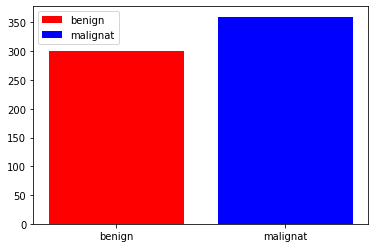

In [4]:
#visulaize test_data
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(["benign"],[300],color= "r",label='benign')
ax.bar(["malignat"],[360],color ="b",label ="malignat")
ax.legend()

benign


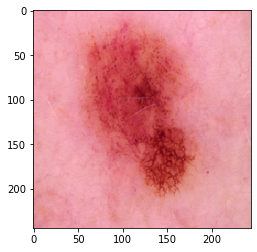

In [5]:
from PIL import Image
from keras.preprocessing import image
image_path = "test/benign/1261.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("benign")
plt.imshow(new_img)

In [7]:
from keras.applications import VGG19,Xception,VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras import layers
import tensorflow as tf

## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(2, activation= 'softmax')
])

In [9]:
import keras
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#early stopping function
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [10]:
#fit the model
histroy=model.fit(train_data,
    validation_data = test_data, 
    callbacks=[early],
    epochs = 50)

Epoch 1/50
83/83 [==============================] - 21s 251ms/step - loss: 0.6135 - accuracy: 0.6530 - val_loss: 0.5521 - val_accuracy: 0.7727
Epoch 2/50
83/83 [==============================] - 11s 134ms/step - loss: 0.5054 - accuracy: 0.7490 - val_loss: 0.5349 - val_accuracy: 0.7939
Epoch 3/50
83/83 [==============================] - 11s 134ms/step - loss: 0.4722 - accuracy: 0.7744 - val_loss: 0.4640 - val_accuracy: 0.7652
Epoch 4/50
83/83 [==============================] - 11s 134ms/step - loss: 0.4660 - accuracy: 0.7782 - val_loss: 0.4354 - val_accuracy: 0.8091
Epoch 5/50
83/83 [==============================] - 11s 134ms/step - loss: 0.4248 - accuracy: 0.7948 - val_loss: 0.4154 - val_accuracy: 0.8076
Epoch 6/50
83/83 [==============================] - 11s 134ms/step - loss: 0.4320 - accuracy: 0.7922 - val_loss: 0.3719 - val_accuracy: 0.8242
Epoch 7/50
83/83 [==============================] - 11s 134ms/step - loss: 0.4470 - accuracy: 0.7812 - val_loss: 0.3869 - val_accuracy: 0.8091

In [11]:
#evulate model
model.evaluate(test_data)

21/21 [==============================] - 1s 52ms/step - loss: 0.3729 - accuracy: 0.8258


[0.3729471266269684, 0.8257575631141663]

In [12]:
#predict val data
y_pred = model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)

[0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0
 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0
 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 1 1 1 1 1 0 1 0 0 1 

In [15]:
Filename = "Skin_Model"  

model.save(Filename)

INFO:tensorflow:Assets written to: Skin_Model\assets


In [16]:
model = keras.models.load_model(Filename)

In [18]:
y_pred = model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)

[0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1
 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1
 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0
 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0
 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 1 